# Visualization Demo

In [5]:
import napari
%gui qt5

In [6]:
from brainlit.utils.ngl_pipeline import NeuroglancerSession
from brainlit.viz.swc import *
from brainlit.viz.visualize import *
import numpy as np
from skimage import io

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/python_jsonschema_objects/__init__.py:53: UserWarning: Schema version http://json-schema.org/draft-04/schema not recognized. Some keywords and features may not be supported.
  self.schema["$schema"]
Using TensorFlow backend.


## Loading Data

In [7]:
# Create a neuroglancersession
ngl_sess = NeuroglancerSession(mip = 1)
img, bbbox, vox = ngl_sess.pull_chunk(2, 300, 1, 1, 1)

Downloading:   0%|          | 0/3 [00:00<?, ?it/s]


## 2D Visualization

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x16a1c6810>)

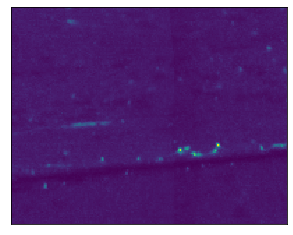

In [8]:
plot_image_2d(img[:,100,:])

Text(0.5, 1.0, 'Third Dimension')

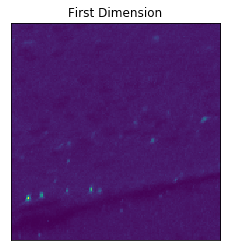

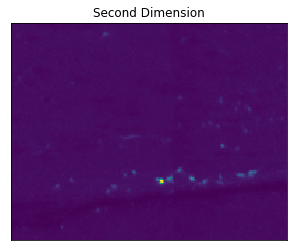

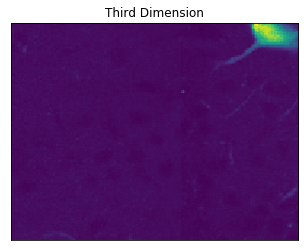

In [9]:
fig1, axes = plot_image_2d(img[50,:,:])
axes.set_title('First Dimension')

fig2, axes = plot_image_2d(img[:,50,:])
axes.set_title('Second Dimension')
    
fig3, axes = plot_image_2d(img[:,:,50])
axes.set_title('Third Dimension')

## Max intensity projection

<class 'matplotlib.figure.Figure'>


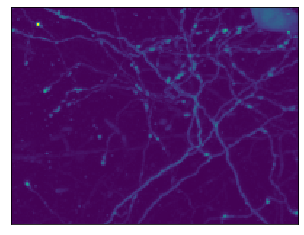

In [10]:
fig, axis = plot_image_mip(img)
print(type(fig))

## Histogram Plot of Image Intensities

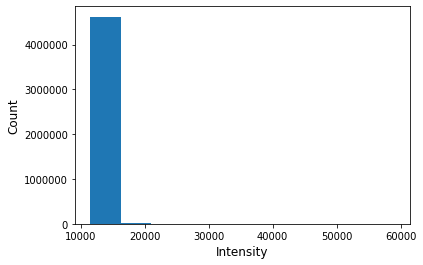

In [11]:
fig = plot_image_hist(img)

## Visualizing all successors or predecessors of a given vertex up to a given depth

In [12]:
s3_path = "s3://mouse-light-viz/precomputed_volumes/brain1_segments"
seg_id = 2
mip = 1
df = read_s3(s3_path, seg_id, mip)
df.head()

Downloading: 100%|██████████| 1/1 [00:00<00:00, 21.29it/s]


,sample,structure,x,y,z,r,parent
0,1,0,4713.0,4470.0,3857.0,1.0,-1
1,4,192,4721.0,4445.0,3849.0,1.0,1
2,7,64,4723.0,4446.0,3851.0,1.0,4
3,8,0,4728.0,4449.0,3852.0,1.0,7
4,14,0,4746.0,4445.0,3858.0,1.0,8


In [13]:
G = df_to_graph(df)
print('Number of nodes:', len(G.nodes))
print('Number of edges:', len(G.edges))
print('\n')
print('Sample 1 coordinates (x,y,z)')
print(G.nodes[1]['x'],G.nodes[1]['y'],G.nodes[1]['z'])

paths = graph_to_paths(G=G)
print(f"The graph was decomposed into {len(paths)} paths")

Number of nodes: 1650
Number of edges: 1649


Sample 1 coordinates (x,y,z)
4713 4470 3857
The graph was decomposed into 179 paths


In [18]:
viewer = napari.Viewer(ndisplay=3)
viewer.add_points(data=np.concatenate(paths, axis=0)[1024:], edge_width=2, edge_color='white', name='all_points')
viewer.add_shapes(data=paths, shape_type='path', edge_color='white', edge_width=3, name='skeleton')

<Shapes layer 'skeleton' at 0x18a22ced0>

In [19]:
v_id = 44  # the row index/number of the data frame
depth = 30  # the depth up to which the graph must be constructed

G_bfs=get_bfs_subgraph(G, v_id, depth, df=df)  # perform Breadth first search to obtain a graph of interest
paths_bfs = graph_to_paths(G=G_bfs[0])  # obtain all the paths for visualization purposes

In [20]:
x = df.iloc[v_id]['x']
y = df.iloc[v_id]['y']
z = df.iloc[v_id]['z']
v_pos = np.array([x,y,z])

# display vertex
viewer.add_points(data=v_pos, edge_width=20, edge_color='orange', name='vertex')

# display all interest nodes around vertex
viewer.add_points(data=np.concatenate(paths_bfs), edge_color='red', edge_width=2, name='subpoints')
viewer.add_shapes(data=paths_bfs, shape_type='path', edge_color='red', edge_width=3, name='sub-skeleton')

<Shapes layer 'sub-skeleton' at 0x18c0002d0>